In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read in the Mental Health data
mental_health_df = pd.read_csv('../survey.csv')
mental_health_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
mental_health_df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [4]:
# Create a dataframe with just the United States
mhUS_df = mental_health_df[mental_health_df['Country'] == "United States"]
mhUS_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN


In [5]:
# Counts for benefits
benefits = mhUS_df['benefits'].value_counts()
print(benefits)

benefits
Yes           398
Don't know    236
No            117
Name: count, dtype: int64


In [6]:
# Counts for treatments
treatments = mhUS_df['treatment'].value_counts()
print(treatments)

treatment
Yes    410
No     341
Name: count, dtype: int64


In [7]:
benefits_treatments = mhUS_df.groupby(['benefits', 'treatment']).size().unstack()
benefits_treatments

treatment,No,Yes
benefits,,
Don't know,151,85
No,48,69
Yes,142,256


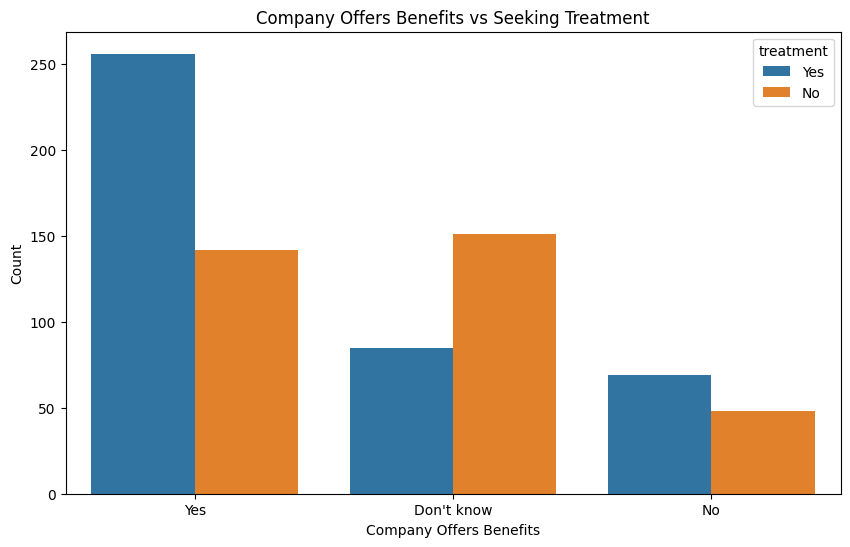

In [8]:
# Bar Chart: Company Offers Benefits vs Seeking Treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=mhUS_df, x='benefits', hue='treatment')
plt.title('Company Offers Benefits vs Seeking Treatment')
plt.xlabel('Company Offers Benefits')
plt.ylabel('Count')
plt.show()

In [14]:
# Counts for age
ages = mhUS_df['Age'].value_counts()
print(ages)

Age
 29     50
 33     46
 32     44
 31     41
 35     41
 25     39
 26     37
 30     37
 28     34
 27     34
 34     33
 36     28
 40     28
 23     27
 38     25
 24     24
 37     21
 43     20
 39     19
 41     16
 42     15
 46     12
 22      9
 45      9
 44      9
 21      7
 50      5
 56      4
 48      4
 57      3
 51      3
 49      3
 18      3
 55      2
 47      2
 19      2
 60      2
 20      2
 329     1
 58      1
 54      1
 62      1
 65      1
 5       1
-29      1
 53      1
 11      1
-1       1
 72      1
Name: count, dtype: int64


In [30]:
# Create a column which indicates a 1 if seeking Treatment
mhUS_df.loc[:, 'Age_Treatment'] = np.where(mhUS_df['treatment'] == 'Yes', 1, 0)
mhUS_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Age_Treatment
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,1
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,0
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,0
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN,0
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN,0
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,1
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,1
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Yes,No,No,No,No,No,No,No,NaN,0


In [34]:
# Remove ages which are less than 18 and make them 18
mhUS_df.loc[:, 'Age'] = np.where(mhUS_df['Age'] < 18, 18, mhUS_df['Age'])
mhUS_df.loc[:, 'Age'] = np.where(mhUS_df['Age'] > 100, 75, mhUS_df['Age'])
mhUS_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Age_Treatment
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,1
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,0
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,0
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN,0
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN,0
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,1
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,1
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Yes,No,No,No,No,No,No,No,NaN,0


In [35]:
# Create a df with only those seeking treatment
treatment_only_df = mhUS_df[mhUS_df['Age_Treatment'] == 1]
treatment_only_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Age_Treatment
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,1
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,1
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN,1
10,2014-08-27 11:32:44,31,Male,United States,OH,NaN,No,Yes,Sometimes,6-25,...,No,No,Some of them,Yes,No,No,Don't know,No,NaN,1
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2015-07-27 23:25:34,30,Male,United States,CA,Yes,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN,1
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Yes,No,Some of them,No,No,Maybe,No,No,NaN,1
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,1
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,1


Axes(0.125,0.11;0.775x0.77)


C:\Users\NERiv\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


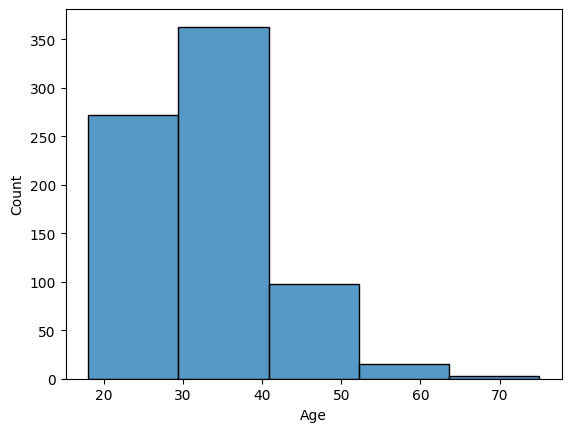

In [41]:
# Histogram: Age Distribution
ages_all = sns.histplot(data=mhUS_df, x='Age', bins=5)
print(ages_all)

Axes(0.125,0.11;0.775x0.77)


C:\Users\NERiv\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


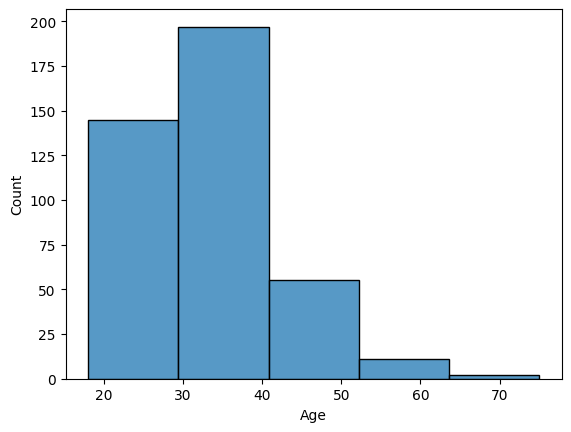

In [42]:
ages_treatment = sns.histplot(data=treatment_only_df, x='Age', bins=5)
print(ages_treatment)